In [8]:
import os
from pyspark import SparkContext,  SparkConf
from pyspark.sql import SparkSession
import findspark
import numpy as np
import pyspark
import pandas as pd
import matplotlib.pyplot as plt
import time 
import pandas
import sys

#### 1. IMPLEMENTATION OF SERIALIZED K-MEANS (1 point)

serialReadFile: It receives a String filename Pandas dataframe with the loaded data.
with name of the csv file of the dataset. The function returns a

serialAssign2cluster: It receives a list of d-dimensional tuples called centroids, representing the current state
of the centroids, and a d-dimensional tuple x which represents the datum to be assigned to a cluster. It returns an
integer with the index in centroids of the closest centroid to x.
    
serialKMeans: Performs the serialized K-Means algorithm on the dataset X, grouping the instances into K different
clusters. The number of iterations of the method to be executed is n_iter. The initialization of the centroids will be
random, sampled from a standard normal distribution. It returns a list of length K with the d-dimensional centroids
computed.

In [5]:
def serialReadFile(filename):
    data = pd.read_csv(filename)
    X = data.iloc[:, 1:]
    y = data['label']
    return X, y

def serialAssign2cluster(x, centroids):
    # Computes squared Euclidean distance and returns the index of the closest centroid.
    squared_distances = np.sum((x - centroids)**2, axis=1)
    return np.argmin(squared_distances)
        
    return index

def serialKMeans(X, K, n_iter):
    # Performs the serialized K-Means algorithm.
    X_array = X.values 
    n_samples, n_features = X_array.shape

    # Initialize centroids as a 2D NumPy array from standard normal distribution.
    centroids = np.random.randn(K, n_features)
    labels = np.zeros(n_samples, dtype=int)
    
    for iteration in range(n_iter):
        
        # Assignment Step: Assign each point to its closest cluster.
        for i in range(n_samples):
            labels[i] = serialAssign2cluster(X_array[i], centroids)
        
        # Centroid Update Step
        new_centroids = np.zeros_like(centroids)
        
        for k in range(K):
            cluster_points = X_array[labels == k]
            
            if cluster_points.shape[0] > 0:
                # Recalculate mean
                new_centroids[k] = cluster_points.mean(axis=0)
            else:
                # Handle empty cluster: reinitialize with a random data point.
                random_index = np.random.randint(n_samples)
                new_centroids[k] = X_array[random_index]

        # Convergence Check: stop if centroids haven't changed significantly.
        if np.allclose(centroids, new_centroids):
            print(f"Converged at iteration {iteration + 1}.")
            centroids = new_centroids
            break
            
        centroids = new_centroids
    
    # Return a list of length K with the d-dimensional centroids computed.
    return [tuple(c) for c in centroids]

In [6]:
def plot_centroids(centroids, title="K-Means Centroids"):
    
    K = len(centroids)
    grid_size = int(np.ceil(np.sqrt(K)))
    
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))
    axes = axes.flatten() # Flatten the 2D array of axes for easy indexing

    for i, centroid in enumerate(centroids):
        if i < K:
            image = np.array(centroid).reshape(28, 28)
            axes[i].imshow(image, cmap='gray')
            axes[i].set_title(f'Cluster {i}')
            axes[i].axis('off') # Hide axes ticks for cleaner image display
        else:
            # Hide unused subplots if K is not a perfect square
            axes[i].axis('off')

    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
    plt.show()

In [15]:
data, y = serialReadFile('mnist_dataset.csv')

In [16]:
centroids = serialKMeans(data, 10, 10)

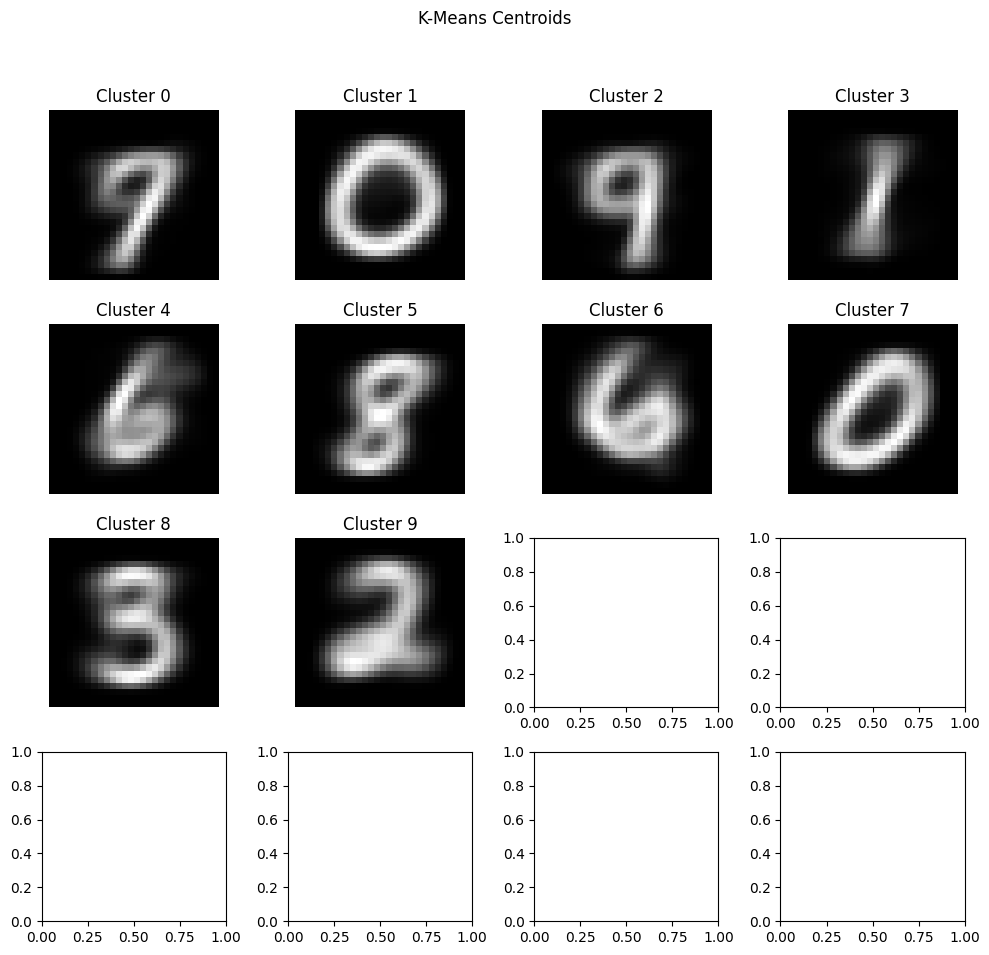

In [17]:
plot_centroids(centroids)